In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号 
from scipy.optimize import curve_fit

# 定义非线性模型
def my_model(x, k, b):
    return k*x + b 

In [2]:
from math import log,floor

def string_result(x,dx,latex=False):
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    duobao=0
    if (value_dx<2):
        duobao=1
    
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    delord+=duobao
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if order_x!=0:
        if latex:
            return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
        else:
            return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')
    else:
        if latex:
            return(f'${value_x_show}\\pm{value_dx_show}$')
        else:
            return(f'{value_x_show} ± {value_dx_show}')

In [3]:
import os
os.makedirs('output', exist_ok=True)

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

myfile_list= []

for file_name in sorted_file_list:
    if file_name[-3:]=='csv':
        myfile_list.append(file_name)

myfile_list

['20000101_031854.csv', '20000101_032018.csv', '20000101_032404.csv']

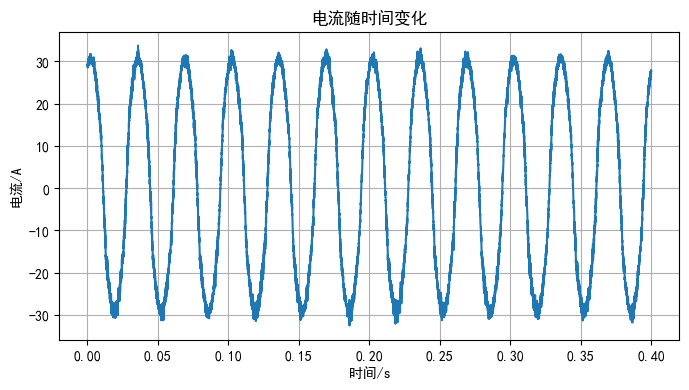

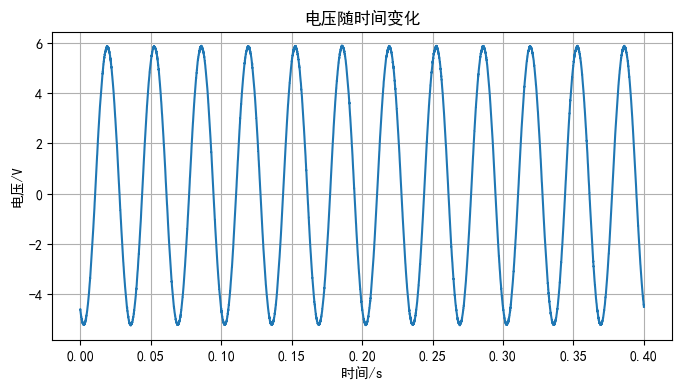

In [4]:
df = pd.read_csv('20000101_031854.csv')
x_data = df.iloc[10:, 0].to_numpy(dtype=int)
ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

time_dict = {'S': 1, 'mS': 1e-3, 'uS': 1e-6 ,'nS':1e-9}

time_interval=float(df.iloc[7, 1][:-2])*time_dict[df.iloc[7, 1][-2:]]
time_data=x_data*time_interval

V_data=ch1_data
I_data=ch2_data*100

plt.figure(figsize=(8, 4))

# 绘制CH1的数据
# plt.plot(time_data, ch1_data, )
plt.plot(time_data, I_data, label='电流I')
plt.xlabel('时间/s')
plt.ylabel('电流/A')
plt.title("电流随时间变化")

plt.grid(True)
# plt.legend()
plt.show()

plt.figure(figsize=(8, 4))

# 绘制CH1的数据
# plt.plot(time_data, ch1_data, )
plt.plot(time_data, V_data, label='电压')
plt.xlabel('时间/s')
plt.ylabel('电压/V')
plt.title("电压随时间变化")

plt.grid(True)
# plt.legend()
plt.show()


In [5]:
def intersection_point(m1, b1, m2, b2):
    # 计算交点的 x 坐标
    x = (b2 - b1) / (m1 - m2)
    
    # 使用其中一条直线的方程计算对应的 y 坐标
    y = m1 * x + b1
    
    return x, y

# 示例
m1 = 2
b1 = 1
m2 = -1
b2 = 3

x_intersect, y_intersect = intersection_point(m1, b1, m2, b2)

print(f"交点坐标: ({x_intersect}, {y_intersect})")


交点坐标: (0.6666666666666666, 2.333333333333333)


数据来自20000101_031854.csv

这是-1V<U1<1.5V的结果
斜率的结果为:$-7.88\pm0.05$
截距的结果为:$3.27\pm0.04$
决定系数R^2为:0.9433809610122987

这是U1<-1.8V的结果
斜率的结果为:$-4.306\pm0.012$
截距的结果为:$8.29\pm0.05$
决定系数R^2为:0.9691178584087338

这是U1>2.5V的结果
斜率的结果为:$-4.291\pm0.016$
截距的结果为:$-4.28\pm0.08$
决定系数R^2为:0.951751624357666



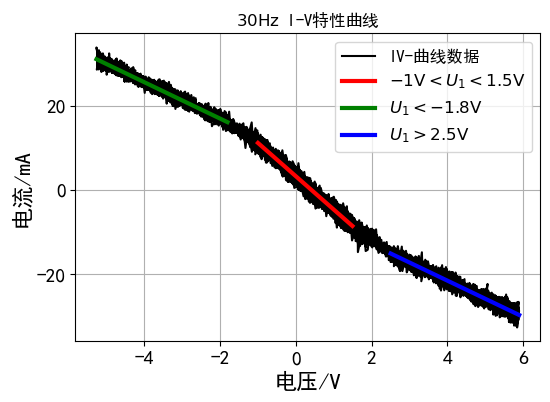

负段的斜率为:-4.3064914058699495
正段的斜率为:-4.291095372175594
交点为[-1.40596129 14.34944824]和[  2.10259872 -13.30371108]
中点坐标为[0.34831871 0.52286858]
中段的斜率为:-7.8816264556089335
中段的截距为:3.268186578078711
Uc=1.754280000400192

数据来自20000101_032018.csv

这是-1V<U1<1.5V的结果
斜率的结果为:$-7.81\pm0.03$
截距的结果为:$3.34\pm0.02$
决定系数R^2为:0.9810533586408562

这是U1<-1.8V的结果
斜率的结果为:$-4.259\pm0.012$
截距的结果为:$8.22\pm0.05$
决定系数R^2为:0.9728642251258918

这是U1>2.5V的结果
斜率的结果为:$-4.325\pm0.015$
截距的结果为:$-3.91\pm0.07$
决定系数R^2为:0.9560210361970537



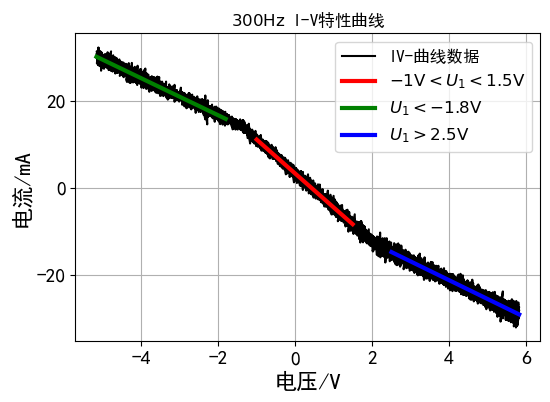

负段的斜率为:-4.258829495449946
正段的斜率为:-4.324695968050701
交点为[-1.37589115 14.08397317]和[  2.08365567 -12.92032587]
中点坐标为[0.35388226 0.58182365]
中段的斜率为:-7.805733084664826
中段的截距为:3.3441341310904433
Uc=1.7297734078205327

数据来自20000101_032404.csv

这是-1V<U1<1.5V的结果
斜率的结果为:$-7.79\pm0.05$
截距的结果为:$3.15\pm0.04$
决定系数R^2为:0.944450581849858

这是U1<-1.8V的结果
斜率的结果为:$-4.218\pm0.015$
截距的结果为:$8.12\pm0.06$
决定系数R^2为:0.9539736916364977

这是U1>2.5V的结果
斜率的结果为:$-4.218\pm0.018$
截距的结果为:$-4.39\pm0.08$
决定系数R^2为:0.9404638083779774



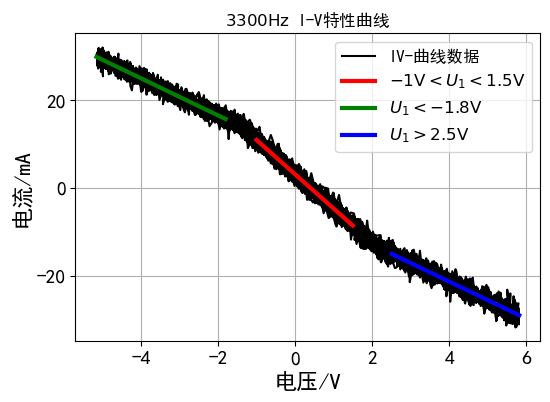

负段的斜率为:-4.217830379594502
正段的斜率为:-4.21823445123901
交点为[-1.38997708 13.97979789]和[  2.11025128 -13.28789221]
中点坐标为[0.3601371  0.34595284]
中段的斜率为:-7.790260334977047
中段的截距为:3.1515146064817476
Uc=1.750114176561411



In [22]:
Hzdata=[30,300,3300]

xlist_list=[]
ylist_list=[]

for j in range(3):
    file=myfile_list[j]

    print(f"数据来自{file}")
    print()
    df = pd.read_csv(file)
    ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
    ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

    V_data=ch1_data
    I_data=ch2_data*100
    plt.figure(figsize=(6, 4))

    # 绘制CH1的数据
    plt.plot(V_data, I_data,label='IV-曲线数据',color='black')
    plt.xlabel('电压/V')
    plt.ylabel('电流/mA')
    plt.title(f"${Hzdata[j]}\\mathrm{{Hz}}$ I-V特性曲线")



    #=================
    print("这是-1V<U1<1.5V的结果")
    indices = np.where((V_data>=-1)&(V_data<1.5))
    x_data=V_data[indices]
    y_data=I_data[indices]

    params, covmatrix = curve_fit(my_model, x_data, y_data)
    std = np.sqrt(np.diag(covmatrix))
    y_fit = my_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    # 计算决定系数 R^2
    r_squared = 1 - (rss / tss)

    # 结果报道
    dict = {0:'斜率',1:'截距'}
    for i in range(params.shape[0]):
        print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
    print(f"决定系数R^2为:{r_squared}")
    print()
    k0=params[0]
    b0=params[1]
    #绘制拟合曲线
    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)
    linspace_ydata=my_model(linspace_xdata,*params)
    plt.plot(linspace_xdata, linspace_ydata, label='$-1\\mathrm{{V}}<U_1<1.5\\mathrm{{V}}$', color='r',lw=3)

    #=====================

    print("这是U1<-1.8V的结果")
    indices = np.where(V_data<-1.8)
    x_data=V_data[indices]
    y_data=I_data[indices]

    params, covmatrix = curve_fit(my_model, x_data, y_data)
    std = np.sqrt(np.diag(covmatrix))
    y_fit = my_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    # 计算决定系数 R^2
    r_squared = 1 - (rss / tss)

    # 结果报道
    for i in range(params.shape[0]):
        print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
    print(f"决定系数R^2为:{r_squared}")
    print()
    kn=params[0]
    bn=params[1]
    #绘制拟合曲线
    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)
    linspace_ydata=my_model(linspace_xdata,*params)
    plt.plot(linspace_xdata, linspace_ydata, label='$U_1<-1.8\\mathrm{{V}}$', color='g',lw=3)

    #===================

    print("这是U1>2.5V的结果")
    indices = np.where(V_data>2.5)
    x_data=V_data[indices]
    y_data=I_data[indices]

    params, covmatrix = curve_fit(my_model, x_data, y_data)
    std = np.sqrt(np.diag(covmatrix))
    y_fit = my_model(x_data,*params )
    y_mean = np.mean(y_data)
    tss = np.sum((y_data - y_mean)**2)
    rss = np.sum((y_data - y_fit)**2)
    # 计算决定系数 R^2
    r_squared = 1 - (rss / tss)

    # 结果报道
    for i in range(params.shape[0]):
        print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
    print(f"决定系数R^2为:{r_squared}")
    print()
    kp=params[0]
    bp=params[1]
    #绘制拟合曲线
    max_value = np.max(x_data)
    min_value = np.min(x_data)
    linspace_xdata = np.linspace(min_value, max_value, 1000)
    linspace_ydata=my_model(linspace_xdata,*params)
    plt.plot(linspace_xdata, linspace_ydata, label='$U_1>2.5\\mathrm{{V}}$', color='b',lw=3)


    plt.grid(True)
    plt.legend()
    plt.savefig(f'output/{Hzdata[j]}IVdata.pdf', bbox_inches='tight')
    plt.show()

    ispn=np.array(intersection_point(k0,b0,kn,bn))
    ispp=np.array(intersection_point(k0,b0,kp,bp))

    print(f"负段的斜率为:{kn}")
    print(f"正段的斜率为:{kp}")
    print(f"交点为{ispn}和{ispp}")
    print(f"中点坐标为{(ispn+ispp)/2}")

    print(f"中段的斜率为:{k0}")
    print(f"中段的截距为:{b0}")

    # print(f"Ga={1/k0}")
    # print(f"Gb={2/(kn+kp)}")
    print(f"Uc={(ispp[0]-ispn[0])/2}")

    xlist=[-5,ispn[0],ispp[0],5]
    ylist=[-5*kn+bn,ispn[1],ispp[1],5*kp+bp]
    xlist_list.append(np.array(xlist))
    ylist_list.append(np.array(ylist))


    print('========================================')
    print()


# print(k0,b0,kn,bn,kp,bp)


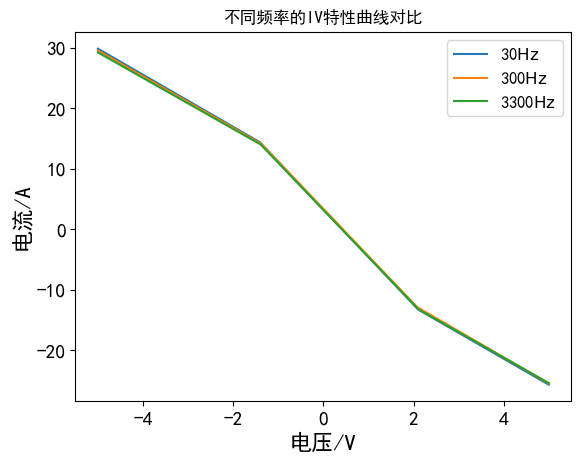

In [23]:
for i in range(3):
    plt.plot(xlist_list[i], ylist_list[i],label=f"{Hzdata[i]}$\\mathrm{{Hz}}$")

# 设置图形的标题和坐标轴标签
plt.title('不同频率的IV特性曲线对比')
plt.xlabel('电压/V')
plt.ylabel('电流/A')

# 显示图形
plt.legend()
plt.savefig('output/diffHz.pdf', bbox_inches='tight')
plt.show()


数据来自20000101_032018.csv

这是-1V<U1<1.5V的结果
斜率的结果为:$-7.81\pm0.03$
截距的结果为:$3.34\pm0.02$
决定系数R^2为:0.9810533586408562

这是U1<-1.8V的结果
斜率的结果为:$-4.259\pm0.012$
截距的结果为:$8.22\pm0.05$
决定系数R^2为:0.9728642251258918

这是U1>2.5V的结果
斜率的结果为:$-4.325\pm0.015$
截距的结果为:$-3.91\pm0.07$
决定系数R^2为:0.9560210361970537



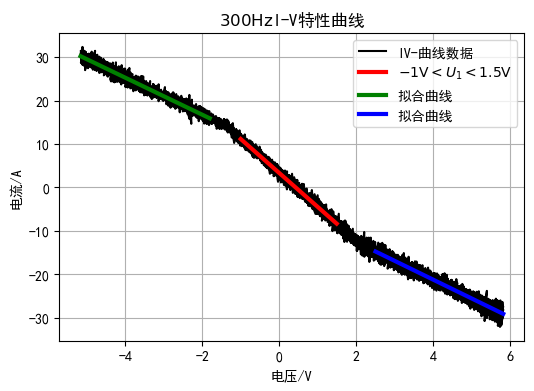

In [8]:
file=myfile_list[1]
print(f"数据来自{file}")
print()
df = pd.read_csv(file)
ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

V_data=ch1_data
I_data=ch2_data*100
plt.figure(figsize=(6, 4))

# 绘制CH1的数据
plt.plot(V_data, I_data,label='IV-曲线数据',color='black')
plt.xlabel('电压/V')
plt.ylabel('电流/A')
plt.title("$300\\mathrm{{Hz}}$I-V特性曲线")



#=================
print("这是-1V<U1<1.5V的结果")
indices = np.where((V_data>=-1)&(V_data<1.5))
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
dict = {0:'斜率',1:'截距'}
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='$-1\\mathrm{{V}}<U_1<1.5\\mathrm{{V}}$', color='r',lw=3)

#=====================

print("这是U1<-1.8V的结果")
indices = np.where(V_data<-1.8)
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='g',lw=3)

#===================

print("这是U1>2.5V的结果")
indices = np.where(V_data>2.5)
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='b',lw=3)


plt.grid(True)
plt.legend()
plt.show()

数据来自20000101_032404.csv

这是-1V<U1<1.5V的结果
斜率的结果为:$-7.79\pm0.05$
截距的结果为:$3.15\pm0.04$
决定系数R^2为:0.944450581849858

这是U1<-1.8V的结果
斜率的结果为:$-4.218\pm0.015$
截距的结果为:$8.12\pm0.06$
决定系数R^2为:0.9539736916364977

这是U1>2.5V的结果
斜率的结果为:$-4.218\pm0.018$
截距的结果为:$-4.39\pm0.08$
决定系数R^2为:0.9404638083779774



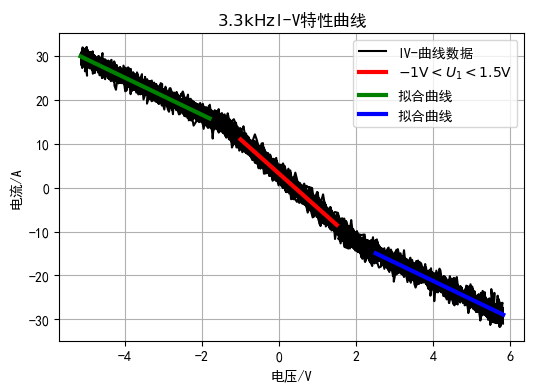

In [9]:
file=myfile_list[2]
print(f"数据来自{file}")
print()
df = pd.read_csv(file)
ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

V_data=ch1_data
I_data=ch2_data*100
plt.figure(figsize=(6, 4))

# 绘制CH1的数据
plt.plot(V_data, I_data,label='IV-曲线数据',color='black')
plt.xlabel('电压/V')
plt.ylabel('电流/A')
plt.title("$3.3\\mathrm{{kHz}}$I-V特性曲线")



#=================
print("这是-1V<U1<1.5V的结果")
indices = np.where((V_data>=-1)&(V_data<1.5))
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
dict = {0:'斜率',1:'截距'}
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='$-1\\mathrm{{V}}<U_1<1.5\\mathrm{{V}}$', color='r',lw=3)

#=====================

print("这是U1<-1.8V的结果")
indices = np.where(V_data<-1.8)
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='g',lw=3)

#===================

print("这是U1>2.5V的结果")
indices = np.where(V_data>2.5)
x_data=V_data[indices]
y_data=I_data[indices]

params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))
y_fit = my_model(x_data,*params )
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)
rss = np.sum((y_data - y_fit)**2)
# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'{dict[i]}的结果为:{string_result(params[i],std[i],latex=True)}')
print(f"决定系数R^2为:{r_squared}")
print()
#绘制拟合曲线
max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)
linspace_ydata=my_model(linspace_xdata,*params)
plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='b',lw=3)


plt.grid(True)
plt.legend()
plt.show()

# 以下为参考代码

第0个参数的结果为:$( 2.09\pm0.08 )\times 10^1$
第1个参数的结果为:$( -3.1\pm0.4 )\times 10^1$
决定系数R^2为:0.9393268942239573


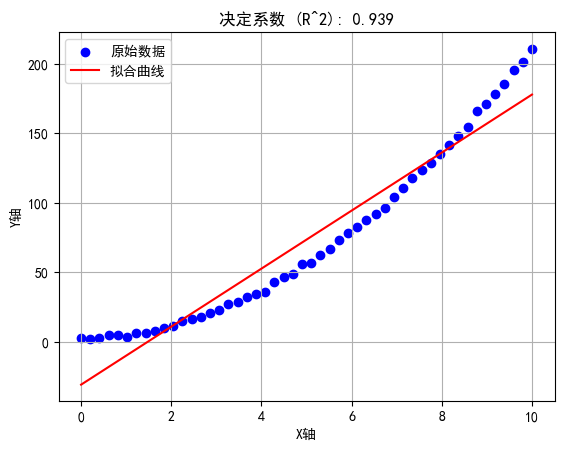

(array([ 20.85883774, -30.80669059]),
 array([0.76517227, 4.44020639]),
 0.9393268942239573)

In [10]:
# 定义非线性模型
def my_model(x, k, b):
    return k*x + b 

# 创建模拟数据
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.scatter(x_data, y_data, label='原始数据', color='b')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
# linspace_ydata=my_model(linspace_xdata,*params)


linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)



plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.3f}")
plt.show()


params,std,r_squared



In [11]:
# import tikzplotlib

my_dict = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,title='Waveforms on the oscilloscope',label1='CH1',label2='CH2',x_label='时间',y_label='电压/V',yrange=((),()),time_unit='s',save=''):
    if time_unit=='us':
        time_unit='μs'
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit]

    # 创建两个子图
    plt.figure(figsize=(8,4))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()
    plt.xlabel(x_label+'/'+time_unit)


    # 设置标题
    plt.suptitle(title)#,fontsize=10)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename,choice=1, title='Waveform on the oscilloscope', label='CH1', x_label='Time', y_label='Voltage (V)', yrange=(), time_unit='s', save=''):
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit]

    # 创建一个图形
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{time_unit}')
    plt.ylabel(y_label)
    plt.title(title)

    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend()

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()

    return x_data, ch1_data, time_unit